# Urban Informatics for Smart, Sustainable Cities
## Assignment 4
### By Kaylyn Levine (kal573)

### Introduction

The Quantified Community, a research initiative at CUSP, has deployed four sensors in the neighborhood of Red Hook, Brooklyn to study the environment.  According to air-nyc.org, the neighborhood of Red Hook experiences a significanlty higher asthma rate compared to other neighborhoods (http://www.air-nyc.org/hospitalizations/).

This analysis identifies patterns and anomalies in environmental data provided by the sensors, and examines potential relationships between these indicators and the built environment. 


### Data Sources
##### Sensor Data
The sensor data was provided directly by Professor Kontokosta. The data range spans from June to July 2016, and includes luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB). 

The sensor number and its corresponding address are listed below:



| Sensor | Location |
|------|------|
|   sensor_0  | 767 Hicks St (roof), Brooklyn, NY 11231 |
|   sensor_2  | 106 Ferris St, Brooklyn, NY 11231 |
|   sensor_3  | 767 Hicks St (ground), Brooklyn, NY 11231 |
|   sensor_4  | 159 Pioneer St, Brooklyn, NY 11231 |


##### Weather Data
The weather data was downloaded from NOAA's Local Climatological Data tool at https://www.ncdc.noaa.gov/cdo-web/datatools/lcd.

The raw dataset contains both daily and hourly weather data, including temperature, humidity, precipitation, and wind readings for a weather station located in Central Park. For this analysis, I only analyzed DAILYAverageDryBulbTemp and DAILYAverageRelativeHumidity, or the daily average temperature and the daily average relative humidity.

### Initial Data Exploration

In [1]:
# set working environment
import pandas as pd
%pylab inline
import pylab as pl
import numpy as np
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import sensor data
data = pd.read_csv('LuxDustNoise.csv')
data.head()


,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


### Step 1: Clean and plot the data for each sensor

In [3]:
# set datetime index
data['dt'] = pd.to_datetime(data['dt'])
data.index = data['dt']
del data['dt']
data.head()

,sensor,lux,con,spl
dt,,,,
2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [4]:
# separate each sensor into its own dataframe for analysis
sensor_0 = data[data['sensor'] == 'sensor_0']
sensor_2 = data[data['sensor'] == 'sensor_2']
sensor_3 = data[data['sensor'] == 'sensor_3']
sensor_4 = data[data['sensor'] == 'sensor_4']

#### Exploratory Plots

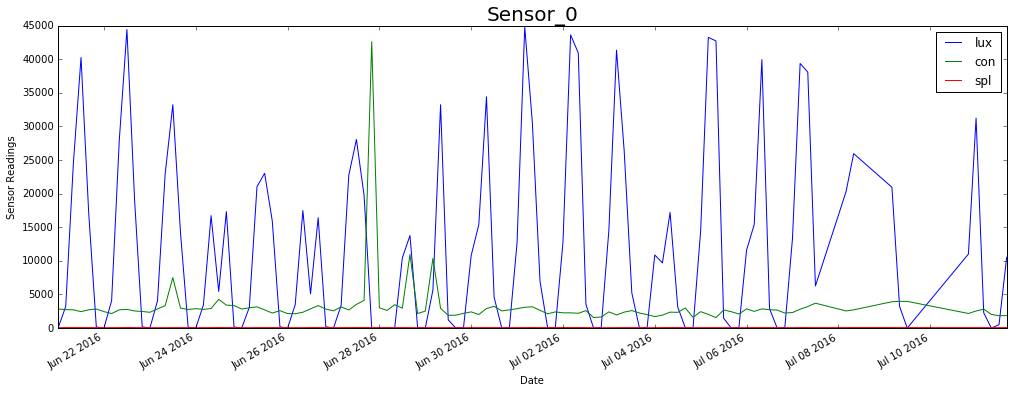

In [5]:
ax = sensor_0.plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_0", fontsize = 20)


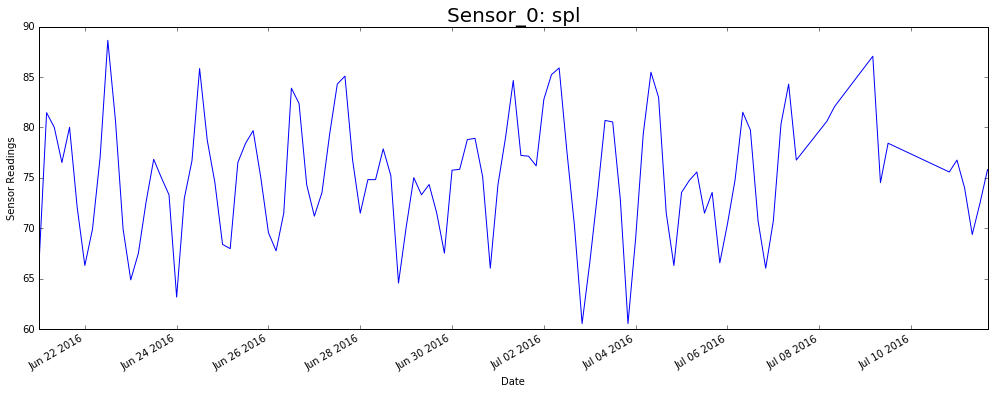

In [6]:
ax = sensor_0['spl'].plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_0: spl", fontsize = 20)

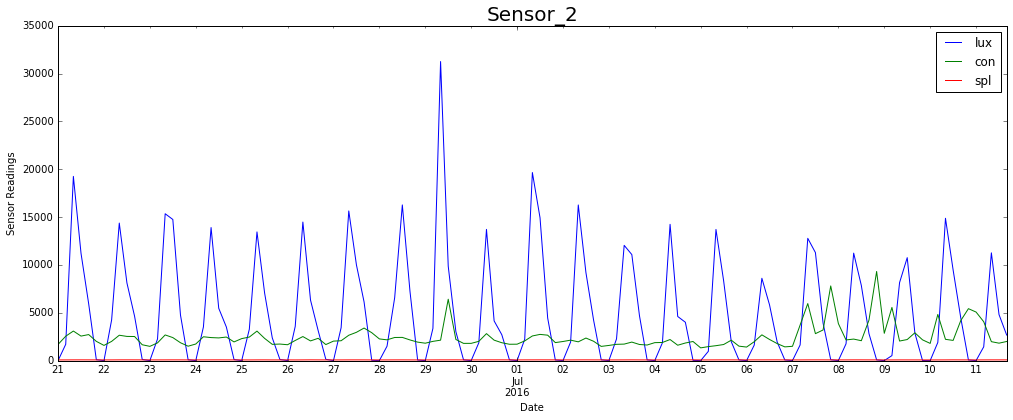

In [7]:
ax = sensor_2.plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_2", fontsize = 20)

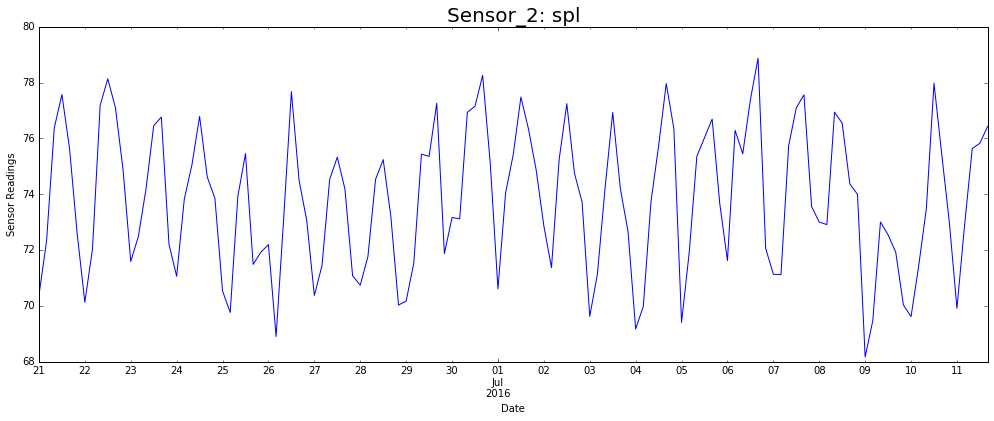

In [8]:
ax = sensor_2['spl'].plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_2: spl", fontsize = 20)

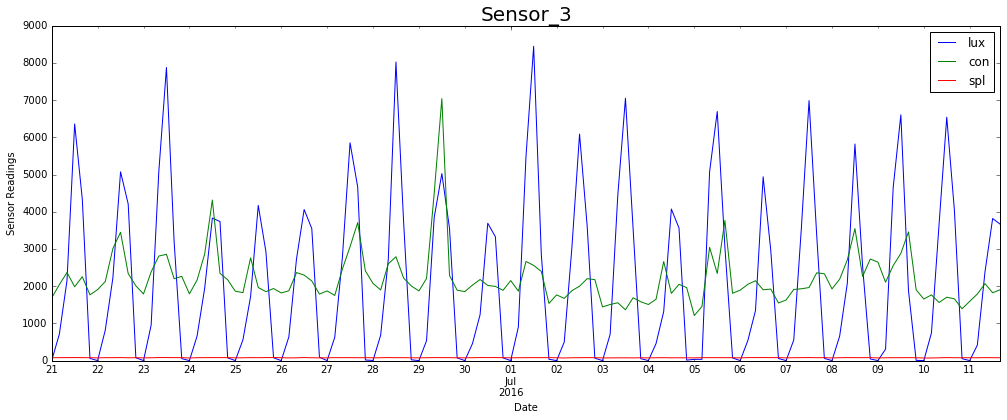

In [9]:
ax = sensor_3.plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_3", fontsize = 20)

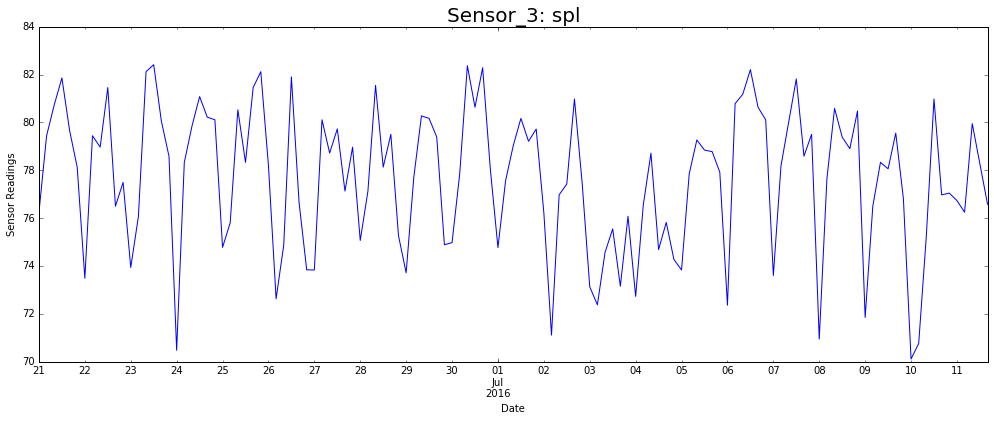

In [10]:
ax = sensor_3['spl'].plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_3: spl", fontsize = 20)

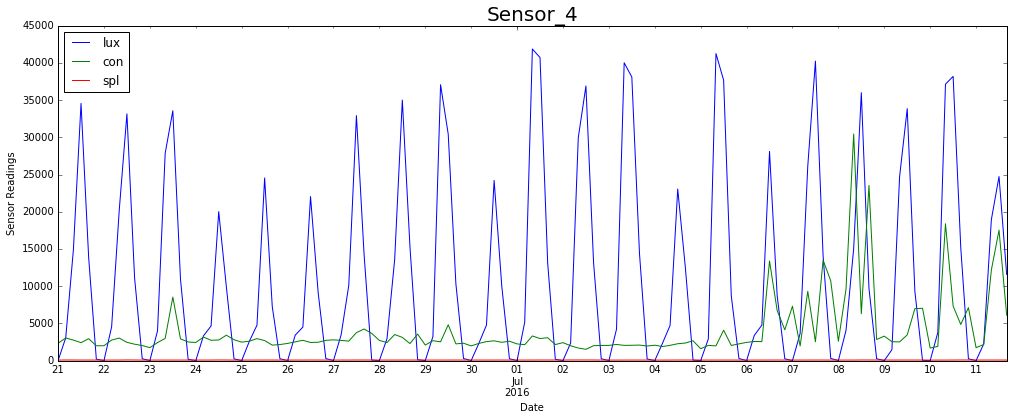

In [11]:
ax = sensor_4.plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_4", fontsize = 20)

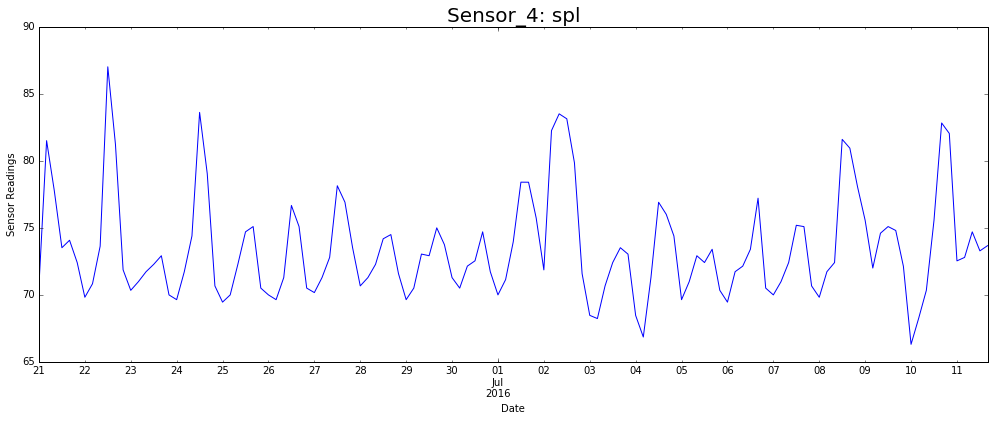

In [12]:
ax = sensor_4['spl'].plot(figsize = (17,6))
pl.ylabel('Sensor Readings')
pl.xlabel('Date')
pl.title("Sensor_4: spl", fontsize = 20)

### Step 2: Describe Daily Patterns:
**Sensor_0: **
* Lux peaks at noon and reaches its minimum overnight.
* Con remains fairly constant except during the last few days of June.
* Spl has high peaks during the day and valleys at night.

**Sensor_2: **
* Lux peaks in the morning and reaches its minimum in the early evening.
* Con varies during July 7th through July 11th.
* Spl has high peaks during the day and valleys at night.

**Sensor_3: **
* Lux peaks at noon and reaches its minimum overnight.
* Con spikes June 29th but otherwise reaches a peak in the afternoon.
* Spl has high peaks during the day and valleys at night.


**Sensor_4: **
* Lux peaks in the afternoon and reaches its minimum overnight.
* Con spikes July 6th through July 11th.
* Spl has high peaks during the late afternoon and valleys at night.

### Step 3: Identify anomalous activity:
**Sensor_0:** Con spikes on June 28th, and Lux deviates on July 9th.

**Sensor_2:** Lux spikes June 29th, followed immediately by a spike in Con. Con also spikes July 7th-9th.

**Sensor_3:** Lux peaks at noon and reaches its minimum overnight.

**Sensor_4:** Lux peaks in the afternoon and reaches its minimum overnight.

These anomalies are identified below using a threshold of three standard deviations above the mean, a common statistical methodology.

In [13]:
# sensor_0
# create 3 standard deviation threshold to determine significant event in con sensor
threshold_0 = 3*sensor_0.con.std()
sensor_0[sensor_0.con > threshold_0]

,sensor,lux,con,spl
dt,,,,
2016-06-27 20:00:00,sensor_0,44.0,42612.265,76.766054


In [14]:
# sensor_2
# no datapoints deviated 3 sd from the mean for this sensor
threshold_2 = 3*sensor_0.lux.std()
sensor_2[sensor_2.lux > threshold_2]

,sensor,lux,con,spl
dt,,,,


In [15]:
# sensor_3
threshold_3 = 3*sensor_3.con.std()
sensor_3[sensor_3.con > threshold_3]

,sensor,lux,con,spl
dt,,,,
2016-06-21 08:00:00,sensor_3,2152.875,2369.71750,80.738609
2016-06-21 16:00:00,sensor_3,4337.125,2255.37750,79.675113
2016-06-22 08:00:00,sensor_3,2226.375,3012.77750,78.968333
2016-06-22 12:00:00,sensor_3,5074.875,3450.05375,81.458913
2016-06-22 16:00:00,sensor_3,4209.375,2337.99625,76.497049
2016-06-23 04:00:00,sensor_3,953.625,2386.17375,76.070164
2016-06-23 08:00:00,sensor_3,5075.125,2810.55625,82.123293
2016-06-23 12:00:00,sensor_3,7879.750,2857.31500,82.415898
2016-06-23 16:00:00,sensor_3,3210.125,2202.18125,80.061181


In [16]:
# sensor_4
# create 3 standard deviation threshold to determine significant event in con sensor
threshold_4 = 3*sensor_4.con.std()
sensor_4[sensor_4.con > threshold_4]

,sensor,lux,con,spl
dt,,,,
2016-07-06 12:00:00,sensor_4,28119.750,13388.5000,73.386988
2016-07-07 16:00:00,sensor_4,14136.125,13499.9850,75.079934
2016-07-08 08:00:00,sensor_4,15045.750,30462.6575,72.394911
2016-07-08 16:00:00,sensor_4,9701.250,23540.7300,80.936906
2016-07-10 08:00:00,sensor_4,37156.500,18395.0950,70.323045
2016-07-11 12:00:00,sensor_4,24739.125,17538.6225,73.268664


### Step 4: Link sensor data back to city administrative records to identify possible correlations or causal relationships

#### Relationship between air quality and weather

The air quality sensor data, more specifically the particulate matter concentrations (con) can be correlated with weather data. Air quality has the potential to be related to weather data, such as temperature or humidity. Theoretically, higher air temperatures can increase the speed of chemical reactions in the air. High humidity levels can decrease visibility conditions. 

In [17]:
# import weather data
weather = pd.read_csv('weather_clean.csv')

In [18]:
# remove unneeded columns
weather = weather.loc[:,["DATE", "DAILYAverageDryBulbTemp", "DAILYAverageRelativeHumidity"]]
weather.head()

,DATE,DAILYAverageDryBulbTemp,DAILYAverageRelativeHumidity
0,06/01/16,74.0,47.0
1,06/02/16,70.0,70.0
2,06/03/16,66.0,81.0
3,06/04/16,74.0,76.0
4,06/05/16,68.0,89.0


In [19]:
# rename columns
weather = weather.rename(columns = {'DAILYAverageDryBulbTemp':'avgtemp'})
weather = weather.rename(columns = {'DAILYAverageRelativeHumidity':'avghumidity'})
weather.head()

,DATE,avgtemp,avghumidity
0,06/01/16,74.0,47.0
1,06/02/16,70.0,70.0
2,06/03/16,66.0,81.0
3,06/04/16,74.0,76.0
4,06/05/16,68.0,89.0


In [20]:
# set datetime
weather['dt'] = pd.to_datetime(weather['DATE'])
weather.index = weather['dt']
del weather['DATE']
weather.head()

,avgtemp,avghumidity,dt
dt,,,
2016-06-01,74.0,47.0,2016-06-01
2016-06-02,70.0,70.0,2016-06-02
2016-06-03,66.0,81.0,2016-06-03
2016-06-04,74.0,76.0,2016-06-04
2016-06-05,68.0,89.0,2016-06-05


#### Exploratory Plots

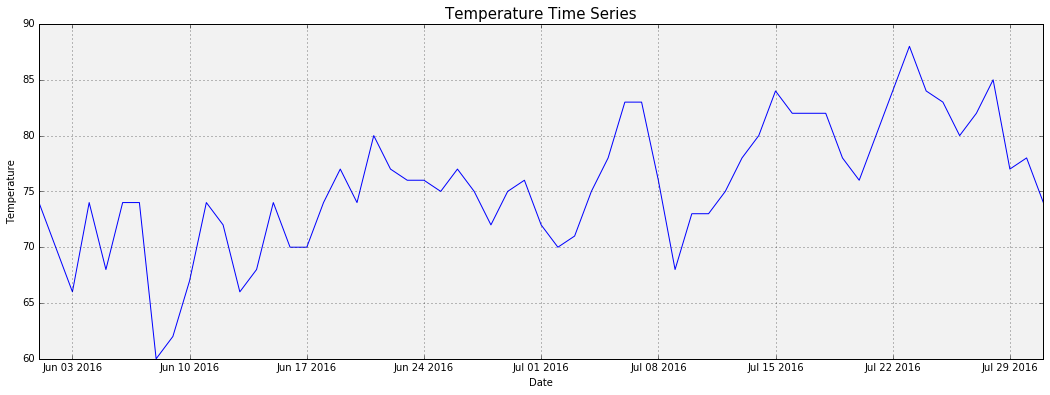

In [21]:
fig = pl.figure(figsize(18,6))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor('#f2f2f2')
pl.plot(weather.dt, weather.avgtemp)
pl.ylabel('Temperature')
pl.xlabel('Date')
pl.grid()
pl.title("Temperature Time Series", size=15)

The temperature timeseries above shows an increasing trend with time (deeper into summer). The highest peaks are reached around July 7th July 15th, and July 23rd. The lowest valley occurs on June 8th. 

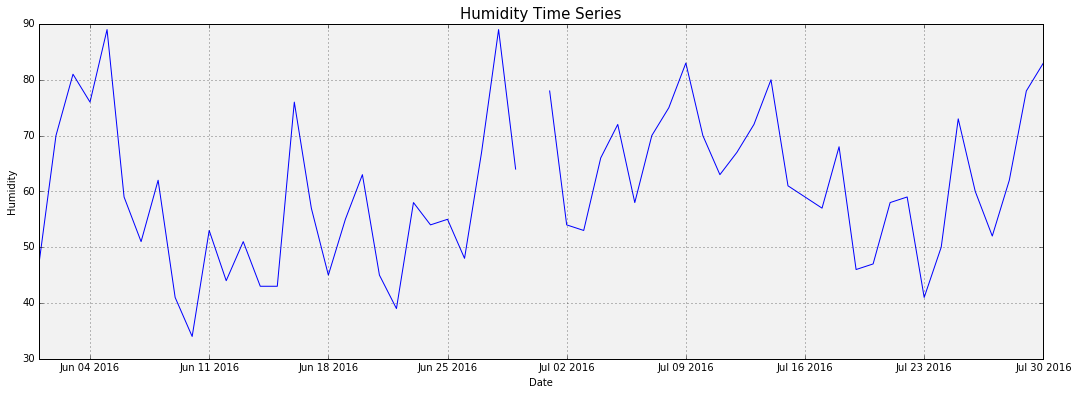

In [22]:
fig = pl.figure(figsize(18,6))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor('#f2f2f2')
pl.plot(weather.dt, weather.avghumidity)
pl.ylabel('Humidity')
pl.xlabel('Date')
pl.grid()
pl.title("Humidity Time Series", size=15)

The humidity timeseries above shows the most humidity occuring on June 5ht, June 28th, and July 9th. It reaches it's minimum valley on June 10th.

#### Merge sensor and weather data to analyze correlation

In [23]:
merge = pd.merge(data, weather, how='inner', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
merge.head()

,sensor,lux,con,spl,avgtemp,avghumidity,dt
dt,,,,,,,
2016-06-21,sensor_0,0.0,2834.03125,66.308479,80.0,45.0,2016-06-21
2016-06-21,sensor_2,0.0,1691.99625,70.375943,80.0,45.0,2016-06-21
2016-06-21,sensor_3,0.0,1686.44125,76.235738,80.0,45.0,2016-06-21
2016-06-21,sensor_4,0.0,2324.65875,70.652334,80.0,45.0,2016-06-21
2016-06-22,sensor_0,0.0,2451.52875,66.308479,77.0,39.0,2016-06-22


In [24]:
msensor_0 = merge[merge['sensor'] == 'sensor_0']
msensor_2 = merge[merge['sensor'] == 'sensor_2']
msensor_3 = merge[merge['sensor'] == 'sensor_3']
msensor_4 = merge[merge['sensor'] == 'sensor_4']

In [25]:
# multiply temperature values by 100 for analysis purposes
msensor_0['avgtemp'] = msensor_0['avgtemp']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
# multiply humidity values by 100 for analysis purposes
msensor_0['avghumidity'] = msensor_0['avghumidity']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


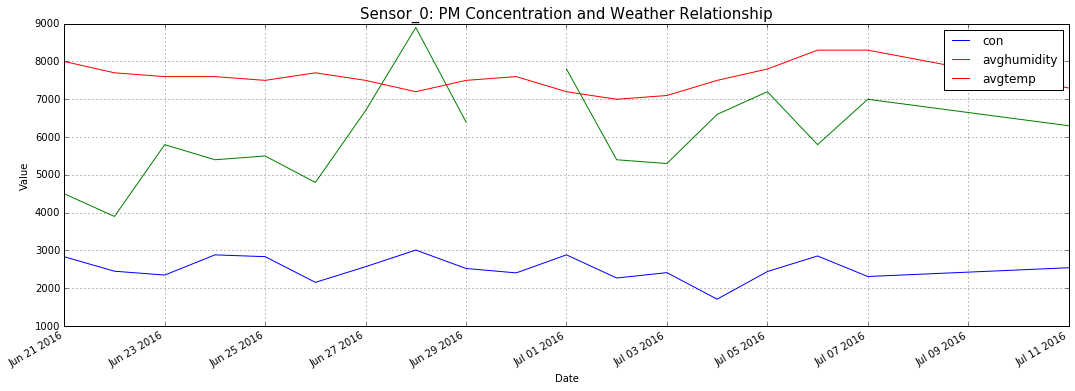

In [27]:
ax = msensor_0.con.plot()
ax = msensor_0.avghumidity.plot()
ax = msensor_0.avgtemp.plot()
pl.ylabel('Value')
pl.xlabel('Date')
pl.grid()
pl.legend()
pl.title("Sensor_0: PM Concentration and Weather Relationship", size=15)

The time series plot above shows a slight correlation between particulate matter concentration and humidity levels. For example, July 26th reveals dips in both dataselts. There is also a similar pattern of values between July 4th and July 7th.
The time series plot above also shows a slight correlation between particulate matter concentration and temperature. For example, after July 5th both datasets increase until approximately July 8th.

In [28]:
# multiply temperature values by 100 for analysis purposes
msensor_2['avgtemp'] = msensor_2['avgtemp']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
# multiply humidity values by 100 for analysis purposes
msensor_2['avghumidity'] = msensor_2['avghumidity']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


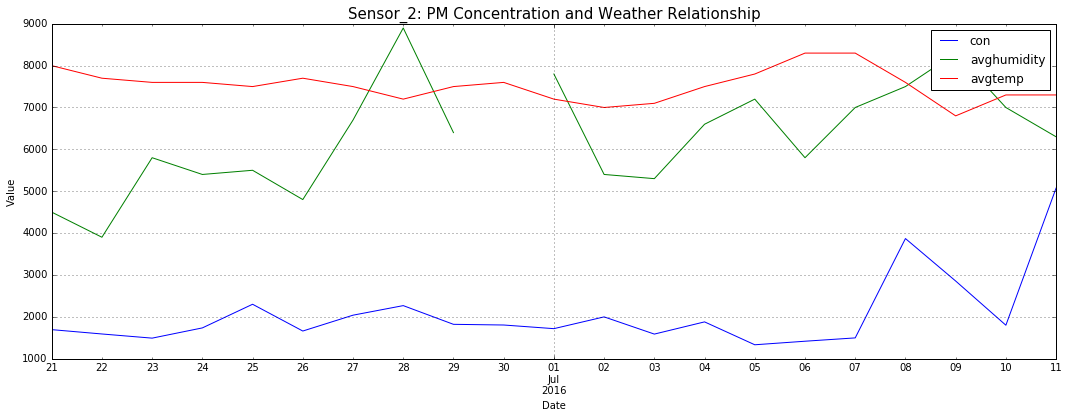

In [30]:
ax = msensor_2.con.plot()
ax = msensor_2.avghumidity.plot()
ax = msensor_2.avgtemp.plot()
pl.ylabel('Value')
pl.xlabel('Date')
pl.grid()
pl.legend()
pl.title("Sensor_2: PM Concentration and Weather Relationship", size=15)

The time series plot above shows a slight correlation between particulate matter concentration and humidity levels. For example, there is a spike and dip in both datasets on June 25th and 26th.
The time series plot above also shows a slight correlation between particulate matter concentration and temperature as there is a dip on July 9th.

In [31]:
msensor_3['avgtemp'] = msensor_3['avgtemp']*100
msensor_3['avghumidity'] = msensor_3['avghumidity']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


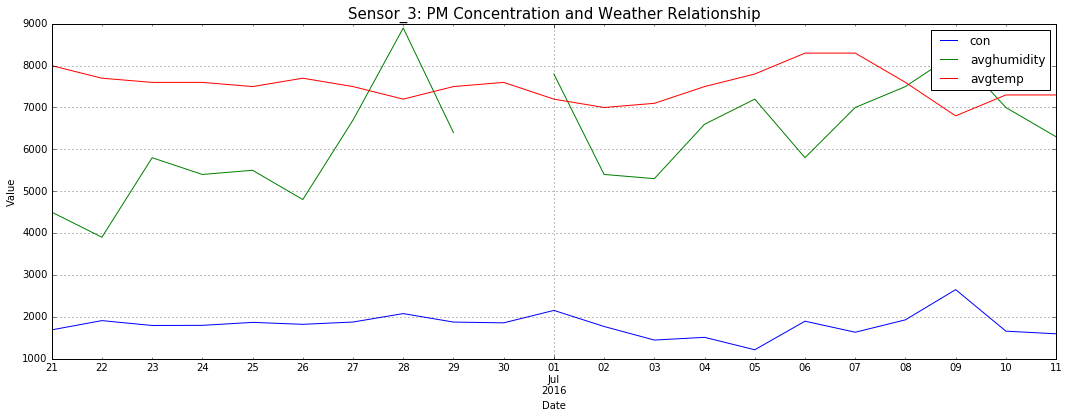

In [32]:
ax = msensor_3.con.plot()
ax = msensor_3.avghumidity.plot()
ax = msensor_3.avgtemp.plot()
pl.ylabel('Value')
pl.xlabel('Date')
pl.grid()
pl.legend()
pl.title("Sensor_3: PM Concentration and Weather Relationship", size=15)

The time series plot above shows a slight correlation between particulate matter concentration and humidity levels. For example, there is a spike on July 9th.
The time series plot above does not show a correlation between particulate matter concentration and temperature.

In [33]:
msensor_4['avgtemp'] = msensor_4['avgtemp']*100
msensor_4['avghumidity'] = msensor_4['avghumidity']*100

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


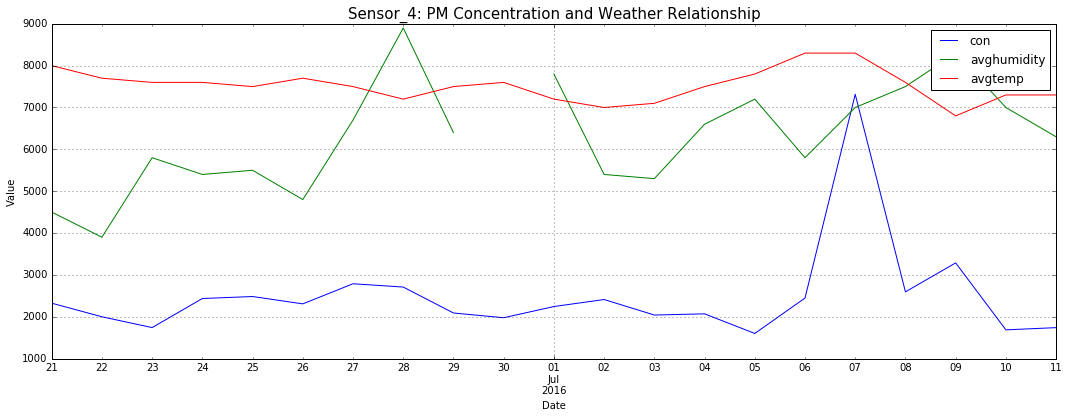

In [34]:
ax = msensor_4.con.plot()
ax = msensor_4.avghumidity.plot()
ax = msensor_4.avgtemp.plot()
pl.ylabel('Value')
pl.xlabel('Date')
pl.grid()
pl.legend()
pl.title("Sensor_4: PM Concentration and Weather Relationship", size=15)

The time series plot above shows a weak correlation between the weather and air quality datasets, but does not reveal the cause of the spike in particulate matter concentration on July 7th.

#### Conclusions

Overall, the particulate matter concentration sensor data is slightly correlated with weather data according to my time series analysis. Trends and patterns are observed in both datasets, and peaks/valleys occur simultaneously on certain days.

A more in-depth analysis of the effects of weather on air quality could be performed in weather data was available for the neighborhood of Red Hook rather than Central Park. This creates a data limitation that might have impacted this analysis. Similarly, more sensors could provide a wider range of particulate matter concentrations and strenghten the analysis.